# Detecting Fake and Real news

**This fake news detection Python project deals with fake and real news. Using sklearn, I built a TfidfVectorizer on the dataset. Next, I initialized the passive-aggressive classifier and fit the model. Ultimately, the accuracy score and confusion matrix tell us how well the model works.**

# What is Fake news ?
Fake news refers to false or misleading information presented as if it were true, often spread through various media outlets, social networks, or websites. It is intentionally fabricated or distorted to deceive readers or viewers, manipulate opinions, or generate clicks and engagement. Fake news can have serious consequences, including misinformation, confusion, and the erosion of trust in reliable sources of information. It's crucial to critically evaluate the credibility of news sources and be cautious about sharing unverified information.

# Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_reportimport PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data

In [12]:
#Read the data
df=pd.read_csv('fake_or_real_news.csv')
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
#Get shape 
df.shape

(6335, 4)

In [14]:
df.dropna()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# Get the labels

In [15]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

# Split the dataset

In [16]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

# What is a TfidfVectorizer?

**Term Frequency (TF):** This measures how frequently a term appears in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in the document. TF increases as the number of occurrences of the term in the document increases.

**Inverse Document Frequency (IDF):** IDF measures the importance of a term within the entire corpus of documents. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term. Terms that are common across many documents have a lower IDF, while rare terms have a higher IDF.

In [17]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [21]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(tfidf_train, y_train)

LinearSVC()

In [23]:
from sklearn.metrics import accuracy_score

accuracy = clf.score(tfidf_train, y_train)
accuracy


0.999802683504341

In [24]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [25]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.58%


In [ ]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

In [34]:
# creating a naive model
pipeline_naive = Pipeline([
    ('vector',TfidfVectorizer(stop_words='english')),
    ('classifier',MultinomialNB())
])
# training the model
pipeline_naive.fit(x_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [36]:
predict_naive = pipeline_naive.predict(x_test)


In [37]:
acc_naive = accuracy_score(y_test,predict_naive)
print(f'Naive model has {acc_naive.round(2)*100}% accuracy')
print('\n')
print(classification_report(y_test,predict_naive))

Naive model has 84.0% accuracy


              precision    recall  f1-score   support

        FAKE       0.97      0.71      0.82       638
        REAL       0.77      0.98      0.86       629

    accuracy                           0.84      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.84      0.84      1267



In [39]:
# creating a logistic model
pipeline_logistic = Pipeline([
    ('vector',TfidfVectorizer(stop_words='english')),
    ('classifier',LogisticRegression())
])

# training the model
pipeline_logistic.fit(x_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', LogisticRegression())])

In [41]:
predict_logistic = pipeline_logistic.predict(x_test)


In [42]:
# Evaluating the logistic model
acc_logistic = accuracy_score(y_test,predict_logistic)
print(f'LogisticRegression model has {acc_logistic.round(2)*100}% accuracy')
print('\n')
print(classification_report(y_test,predict_logistic))

LogisticRegression model has 92.0% accuracy


              precision    recall  f1-score   support

        FAKE       0.90      0.94      0.92       638
        REAL       0.94      0.89      0.91       629

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



Text(0, 0.5, 'Accuracy')

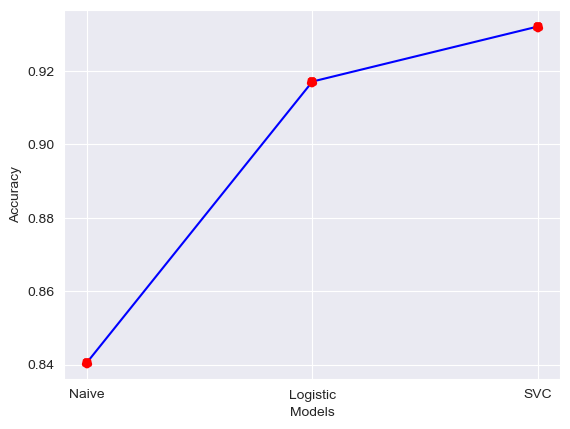

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    'Naive':acc_naive,
    'Logistic':acc_logistic,
    'SVC':acc_svc
}

sns.set_style('darkgrid')
plt.plot(models.keys(),models.values(),marker='*',color='blue',markeredgecolor='red',markeredgewidth=4)
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Summary
Implementing a fake news detection project contributes to information integrity, trust,social media impact and the preservation of democratic processes while also advancing technology and its applications in various domains.